In [1]:
!pip install pmdarima
!pip install pyramid-arima
!pip install statsmodels
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install sklearn

                                              0.0/515.6 kB ? eta -:--:--
     --                                    30.7/515.6 kB 660.6 kB/s eta 0:00:01
     -----                                 71.7/515.6 kB 660.6 kB/s eta 0:00:01
     ----------                           143.4/515.6 kB 950.9 kB/s eta 0:00:01
     -----------------                      235.5/515.6 kB 1.3 MB/s eta 0:00:01
     ------------------------------         409.6/515.6 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 515.6/515.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [288 lines of output]
      Partial import of pyramid during the build process.
      
      Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
      Adding extra setuptools args
      C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
      C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
      C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
      C:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
        warnings.warn("loaded more than 1 DLL from .libs:"
    

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2968 sha256=9a3cca153ae197b036a4b35451d1094fb2ed861214028765fdf4b31173feb5fc
  Stored in directory: c:\users\dioge\appdata\local\pip\cache\wheels\5f\28\a6\4e4fc2959e4ed9b33bf517703534fd8b19b76a842f74c9ed4c
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose

c:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\dioge\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
ITAU_DATA_PATH = "ITUB3 Dados Históricos.csv"

df_itau = pd.read_csv(ITAU_DATA_PATH)
print("Total de linhas e colunas: ", df_itau.shape)
df_itau.head()

Total de linhas e colunas:  (3336, 7)


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,04.01.2010,"8,07","7,79","8,07","7,79","628,70K","4,13%"
1,05.01.2010,"8,08","8,06","8,08","7,97","184,04K","0,12%"
2,06.01.2010,"8,08","8,08","8,08","7,97","117,39K","0,00%"
3,07.01.2010,"8,00","8,02","8,03","7,96","137,55K","-0,99%"
4,08.01.2010,"7,91","7,98","8,00","7,83","96,58K","-1,13%"


In [4]:
Columns = ['Data', 'Último']
train_samples = 2636
test_samples = 700
tick = 100

df_itau = df_itau[-(train_samples + test_samples):]


In [5]:
train = df_itau[:train_samples]
test = df_itau[train_samples:train_samples + test_samples]
all_data = df_itau[:train_samples + test_samples]

train.loc[:, 'Data'] = pd.to_datetime(train['Data'], dayfirst=True)
test.loc[:, 'Data'] = pd.to_datetime(test['Data'], dayfirst=True)
all_data['Data'] = pd.to_datetime(all_data['Data'], dayfirst=True)


# Convertendo os dados para o float32
train.loc[:, 'Último'] = train['Último'].str.replace(',', '.').astype('float32')
test.loc[:, 'Último'] = test['Último'].str.replace(',', '.').astype('float32')


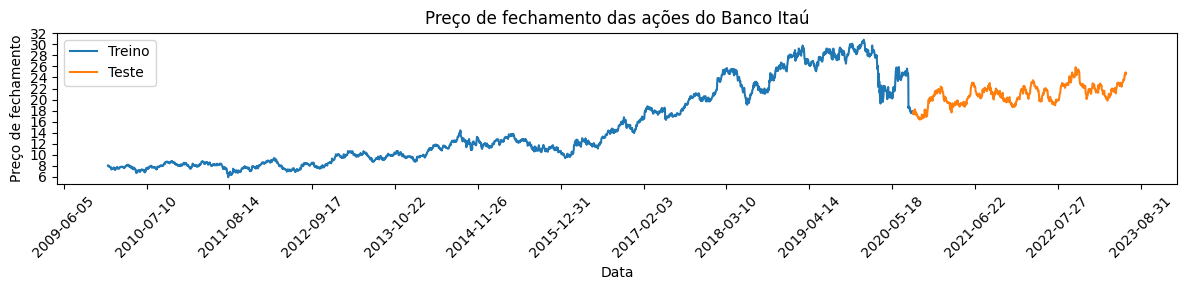

In [6]:
# Definir a frequência dos marcadores nos eixos x e y
tick = 15

# Plot dos dados de treino e teste
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(train['Data'], train['Último'], label='Treino')
ax.plot(test['Data'], test['Último'], label='Teste')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações do Banco Itaú')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.legend(loc='best')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


<Figure size 640x480 with 0 Axes>

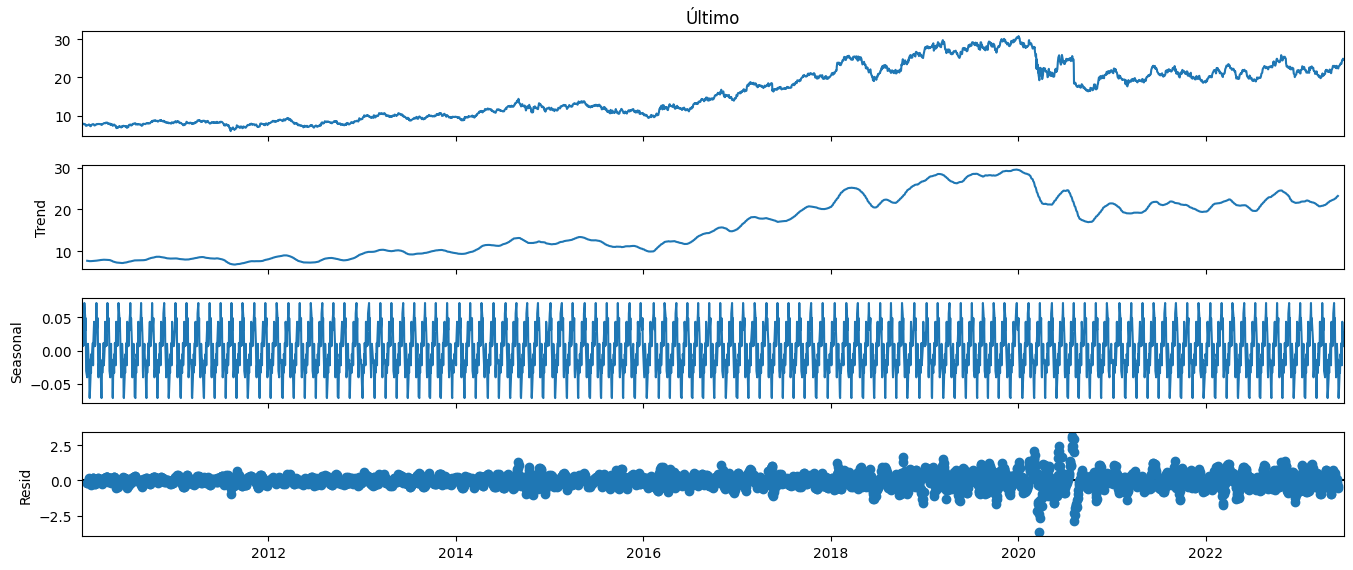

In [7]:
# Definir a coluna 'Data' como índice
indexed_df = all_data.set_index('Data')

# Remover as colunas indesejadas
indexed_df = indexed_df.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], axis=1)

# Converter a coluna 'Último' para o tipo float
indexed_df['Último'] = indexed_df['Último'].astype(float)

# Realizar a decomposição
result = seasonal_decompose(indexed_df['Último'], model='additive', period=30)

# Plotar o gráfico
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 6)
plt.show()



In [8]:
df_copy = indexed_df.copy()

kernel_conv:  [0.07692308 0.23076923 0.38461538 0.23076923 0.07692308]


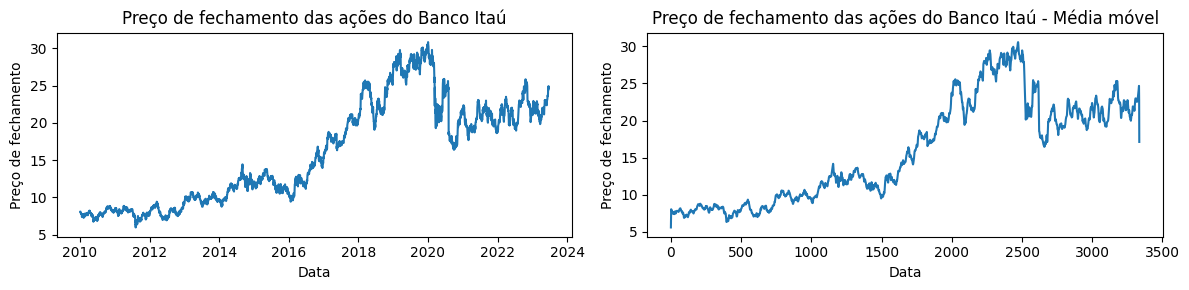

In [9]:
# Kernel de convolução
kernel_conv = np.array([1, 3, 5, 3, 1]) / 13
print("kernel_conv: ", kernel_conv)
# Cálculo da média móvel
media_movel = np.convolve(df_copy['Último'], kernel_conv, mode='same')

# Plotar os gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# Gráfico dos dados originais
ax[0].plot(df_copy['Último'])
ax[0].set_title('Preço de fechamento das ações do Banco Itaú')
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Preço de fechamento')

# Gráfico da média móvel
ax[1].plot(media_movel)
ax[1].set_title('Preço de fechamento das ações do Banco Itaú - Média móvel')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Preço de fechamento')


# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


<Figure size 640x480 with 0 Axes>

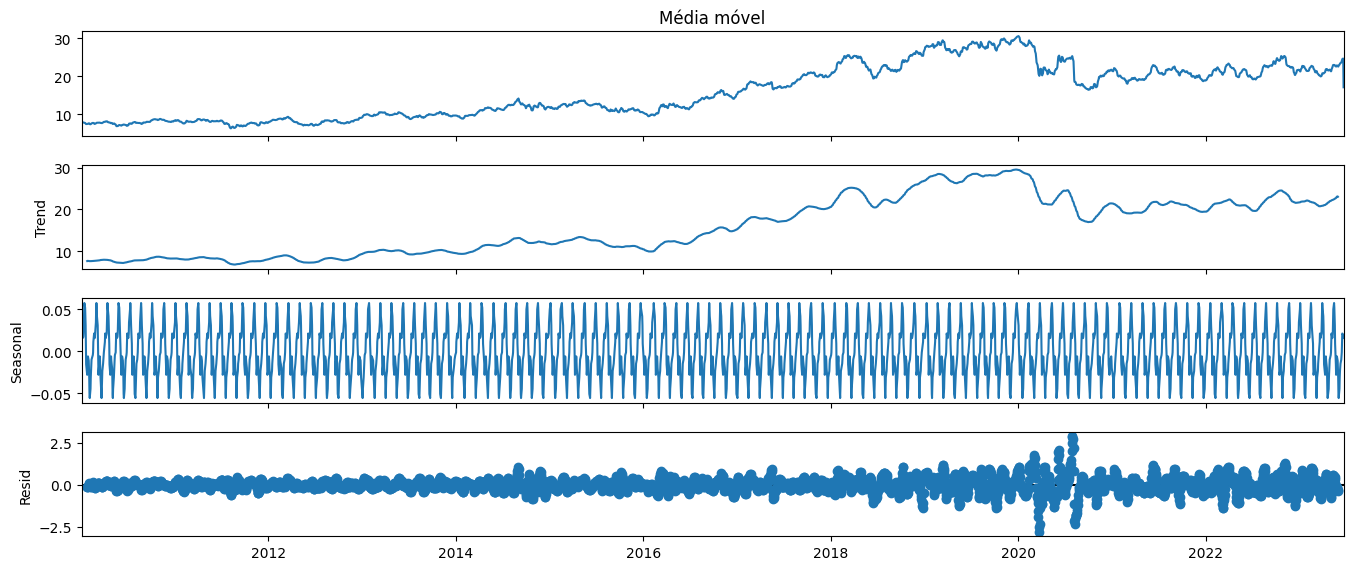

In [10]:
# Seasonal Decompose - Média móvel
df_copy['Média móvel'] = media_movel

# Realizar a decomposição
result = seasonal_decompose(df_copy['Média móvel'], model='additive', period=30)

# Plotar o gráfico
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 6)
plt.show()

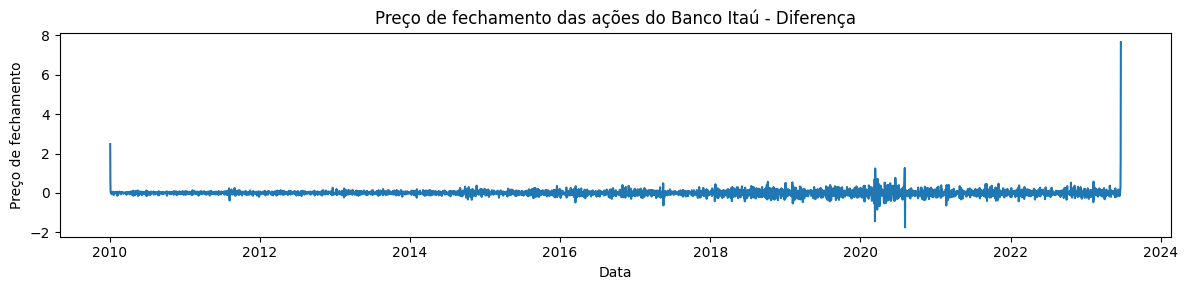

In [11]:
# Transformar a coluna 'Média móvel' em float
df_copy['Média móvel'] = df_copy['Média móvel'].astype(float)

# Calcular a diferença entre os valores
df_copy['Diferença'] = df_copy['Último'] - df_copy['Média móvel']

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(df_copy['Diferença'])
ax.set_title('Preço de fechamento das ações do Banco Itaú - Diferença')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


train:  (2627, 1)
test:  (691, 1)


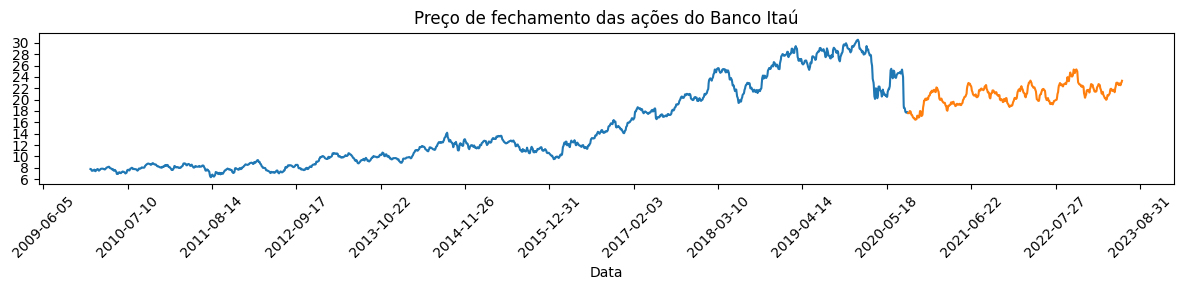

In [12]:
# Separa os dados de treino e teste
train = df_copy[:train_samples]
test = df_copy[train_samples:train_samples + test_samples]

# Drop das colunas indesejadas
train = train.drop(['Último', 'Diferença'], axis=1)
test = test.drop(['Último', 'Diferença'], axis=1)

# Drop das linhas inicias e finais
train = train.drop(train.index[0:9])
test = test.drop(test.index[-9:])
print("train: ", train.shape)
print("test: ", test.shape)

# Rename da coluna 'Média móvel'
train = train.rename(columns={'Média móvel': 'Fechamento'})
test = test.rename(columns={'Média móvel': 'Fechamento'})

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Gráfico dos dados de treino e teste
ax.plot(train['Fechamento'], label='Treino')
ax.plot(test['Fechamento'], label='Teste')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações do Banco Itaú')
plt.xlabel('Data')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [13]:
window_size = 30

df_lag = pd.DataFrame()

# Criar as colunas com os valores passados
for i in range(window_size, 0, -1):
    df_lag['lag_' + str(i)] = train['Fechamento'].shift(i)

# Criar a coluna com os valores futuros
df_lag['futuro'] = train['Fechamento'].shift(-1)

# Drop das linhas com valores nulos
df_lag = df_lag.dropna()

# Exibir as 5 primeiras linhas
df_lag.head()

,lag_30,lag_29,lag_28,lag_27,lag_26,lag_25,lag_24,lag_23,lag_22,lag_21,...,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,futuro
Data,,,,,,,,,,,,,,,,,,,,,
2010-03-03,7.766154,7.742308,7.673077,7.556154,7.465384,7.453846,7.463846,7.480000,7.514615,7.570769,...,7.766154,7.725385,7.621539,7.514615,7.472308,7.496923,7.565385,7.625385,7.683846,7.774615
2010-03-04,7.742308,7.673077,7.556154,7.465384,7.453846,7.463846,7.480000,7.514615,7.570769,7.630000,...,7.725385,7.621539,7.514615,7.472308,7.496923,7.565385,7.625385,7.683846,7.737692,7.796923
2010-03-05,7.673077,7.556154,7.465384,7.453846,7.463846,7.480000,7.514615,7.570769,7.630000,7.660000,...,7.621539,7.514615,7.472308,7.496923,7.565385,7.625385,7.683846,7.737692,7.774615,7.803846
2010-03-08,7.556154,7.465384,7.453846,7.463846,7.480000,7.514615,7.570769,7.630000,7.660000,7.626154,...,7.514615,7.472308,7.496923,7.565385,7.625385,7.683846,7.737692,7.774615,7.796923,7.822308
2010-03-09,7.465384,7.453846,7.463846,7.480000,7.514615,7.570769,7.630000,7.660000,7.626154,7.536923,...,7.472308,7.496923,7.565385,7.625385,7.683846,7.737692,7.774615,7.796923,7.803846,7.835385


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Separa os dados de treino e teste
X_train = df_lag.drop('futuro', axis=1)
y_train = df_lag['futuro']

# Exibir as 5 primeiras linhas
X_train.head()

# Exibir as 5 primeiras linhas
y_train.head()



Data
2010-03-03    7.774615
2010-03-04    7.796923
2010-03-05    7.803846
2010-03-08    7.822308
2010-03-09    7.835385
Name: futuro, dtype: float64

In [15]:
# Criar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Treinar o modelo
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [16]:
# Criar as colunas com os valores passados
df_lag_test = pd.DataFrame()

for i in range(window_size, 0, -1):
    df_lag_test['lag_' + str(i)] = test['Fechamento'].shift(i)

# Criar a coluna com os valores futuros
df_lag_test['futuro'] = test['Fechamento'].shift(-1)

# Drop das linhas com valores nulos
df_lag_test = df_lag_test.dropna()

# Exibir as 5 primeiras linhas
df_lag_test.head()

# Separa os dados de treino e teste
X_test = df_lag_test.drop('futuro', axis=1)
y_test = df_lag_test['futuro']





In [17]:
# Evaluar o modelo
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Calcular o erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)



MSE:  0.18258473677391165
MAE:  0.3428404316857693


In [18]:
ultimo_dia_treino_data = df_copy.index[train_samples]
ultimo_dia_treino_data 




Timestamp('2020-08-27 00:00:00')

In [19]:
# Criar dataframe com os valores futuros
df_futuro = pd.DataFrame(index=pd.date_range(ultimo_dia_treino_data, periods=test_samples + 1, freq='D'))

# Ajustar shape para o y_pred
df_futuro = df_futuro[:y_pred.shape[0]]

# Adicionar a coluna com os valores futuros
df_futuro['Fechamento Previsto'] = y_pred
df_futuro['Fechamento Original'] = y_test.values


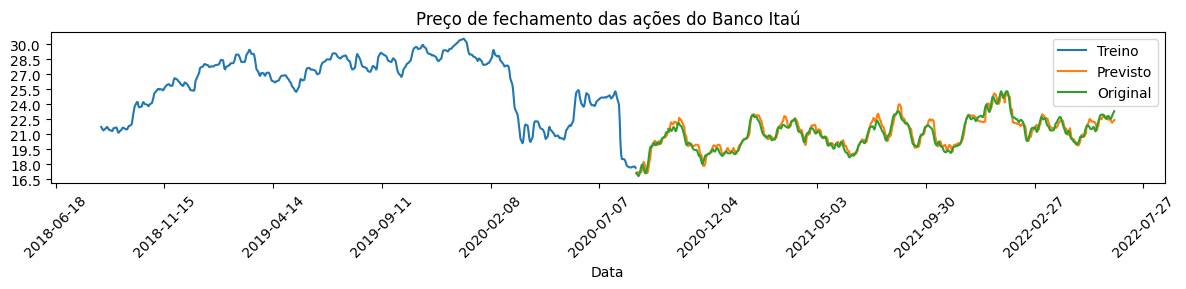

In [20]:
# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Gráfico dos dados de treino e teste
ax.plot(train.iloc[-500:]['Fechamento'], label='Treino')

# Gráfico dos dados previstos
ax.plot(df_futuro['Fechamento Previsto'], label='Previsto')
ax.plot(df_futuro['Fechamento Original'], label='Original')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações do Banco Itaú')
plt.xlabel('Data')
plt.legend()
# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()
